# Project 3 

## Business Case


* In 2020, 6.95 million new phishing and scam pages were created, with the highest number of new phishing and scam sites in one month of 206,310
* The average ransom paid increased 171% from 2019 to 2020 ($115,123 to $312,493), said the 2021 Unit 42 Ransomware Threat Report.
* By September 2020, the average ransom payment peaked at $233,817, according to the 2021 Webroot Brightcloud Threat Report. The report also found that phishing spiked by 510% from January to February 2020 alone.
* According to the Sift Q1 2021 Trust & Safety Index, in 2020 the pandemic increased online giving by 20.7%. This increase in traffic provided cover to fraudsters that hid behind transaction surges:
* Ransomware attacks grew by over 40%.
* Email malware attacks were up by 600% compared to 2019.

Thus improving the detection and reporting of phishing emails/URLs is a critical requirement to reduce the success rate of social engineering attacks, which are the number 1 cause of compromise on corporate networks. Doing can greatly any potential impact of costs associated with ransomware attacks and the legal and reputation costs associated with the disclosure of private data.


## Requirements

Before proceeding, you will be required to install some _Python_ modules. The notebook requires the modules below, which can be installed by executing the code block below.

* `pycaret`;
* `spacy`.

In [79]:
%%capture
!pip install --upgrade pip
!pip install pycaret
!pip install spacy
!python -m spacy download en

## Overall Process

Here are the general steps to classify a large amount of webpages using pycaret:

1. **Collect and preprocess the data**: Collect the webpages that need to be classified and preprocess them to extract the relevant information. This may involve cleaning the text data, removing stop words, and transforming the data into a format that can be used by `pycaret`;
1. **Load the data into a pandas `DataFrame`**: Load the preprocessed data into a pandas `DataFrame`.
1. **Set up the `pycaret` environment**: Initialize the `pycaret` environment and load the data using the `setup()` function. This function automatically preprocesses the data and prepares it for modeling;
1. Train and compare multiple models: Train multiple classification models using the compare_models() function. This function automatically trains and evaluates several models and selects the best one based on performance metrics.
1. Tune the selected model: Use the tune_model() function to fine-tune the selected model and improve its performance.
1. Evaluate the model: Evaluate the final model on the testing set using the evaluate_model() function.
1. Use the model to classify new data: Once the final model is trained and evaluated, use it to classify new webpages using the predict_model() function.
1. Save the model: Save the trained model to a file using the save_model() function so that it can be reused later.
1. Deploy the model: Deploy the trained model in a production environment and use it to classify webpages as needed.

## Preprocessing

The preprocessing steps for webpages can vary depending on the specific requirements of your project, but some common steps include:

1. Retrieving the raw HTML content of each webpage using a web scraping tool such as BeautifulSoup or Scrapy.
1. Cleaning the HTML content by removing HTML tags, script and style tags, and other unwanted content using regular expressions or an HTML parsing library.
1. Tokenizing the cleaned HTML content into words or phrases using a natural language processing library such as NLTK or spaCy.
1. Normalizing the tokens by converting them to lowercase, removing punctuation, and removing stop words (common words that do not add meaning to the text).

### Preprocessing Text Data

To preprocess raw text from webpages for classification using pycaret, you can follow these steps:

1. Clean the HTML tags from the text using a library such as beautifulsoup.
1. Remove stop words and punctuation marks from the text using the nltk library.
1. Tokenize the text into individual words using nltk.
1. Apply stemming or lemmatization to reduce each word to its root form.

## Conversion

1. Creating a document-term matrix or other feature representation of the preprocessed text data that can be used as input to a machine learning algorithm.
1. Convert the processed text into a numerical representation using techniques such as bag of words, TF-IDF, or word embeddings.

In [80]:
#@title Data Source
datafile = "./sample_data/data-2000.csv" #@param {type:"string"}


### Initial Filtering

After specifying the file containing our dataset, we load its contents into a `DataFrame` object. Some additional filtering is done on the dataset to eliminate rows:

* **Non-English Webpages**;
* **Empty Webpages**;

In [81]:
#@title Filtering Options
english_only = True #@param {type:"boolean"}
min_tokens = 3 #@param {type:"integer"}

In [82]:
import pandas as pd

# Read the CSV containing the extracted data from the webpages
df = pd.read_csv(datafile)

# remove rows containing foreign languages
if english_only:
  df = df[df['is_english'] == True]
# Keep rows with at least 3 tokens in the `text_clean` column
df = df[df['nb_tokens'] >= min_tokens ]
# Remove misclassified rows
df = df[(df['classification'] == 'benign') | (df['classification'] == 'malicious')]

# Show a sample of the data
display(df.head(5))
display(df.tail(5))

,title_raw,is_english,has_form,has_login_form,has_js,js_include_b64,nb_tokens,text_clean,classification
0,quizzstar,True,False,False,True,False,619,quizzstar fortune personality life friends lov...,benign
2,: : kakprosto.ru :,True,True,True,True,True,137,kakprosto.ru javascript hi-tech new english ve...,benign
3,standard chartered bank,True,False,False,False,False,3,standard chartered bank,benign
4,NaN,True,False,False,True,False,40,ummy video downloader english trke spaol bahas...,benign
5,", . schools.by",True,True,True,True,False,45,schools.by 3609 ... schoolpay schoolpay sms- ....,benign


,title_raw,is_english,has_form,has_login_form,has_js,js_include_b64,nb_tokens,text_clean,classification
1994,...,True,False,True,True,False,6,... session expired password keep logged,malicious
1995,sign in,True,True,True,True,False,8,sign forgot password sign dont square account ...,malicious
1996,sign in to your account,True,True,True,True,False,21,sign account caroline.klein oecd.org enter pas...,malicious
1997,sign in,True,True,True,True,False,3,sign authenticating ...,malicious
1998,sign in to your account,True,False,True,True,False,31,sign account sign microsoft account n't exist ...,malicious


### Dataset Information

#### Size

In [83]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 1578 rows and 9 columns.


#### Empty Columns

In [84]:
df.isnull().sum()

title_raw         160
is_english          0
has_form            0
has_login_form      0
has_js              0
js_include_b64      0
nb_tokens           0
text_clean          0
classification      0
dtype: int64

#### Labels

<AxesSubplot:>

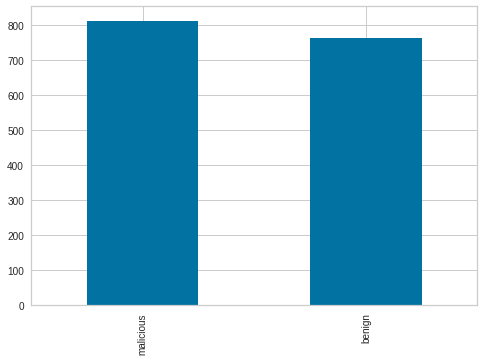

In [85]:
import matplotlib.pyplot as plt

# assume "df" is your DataFrame object
classification_counts = df['classification'].value_counts()

# plot the histogram
classification_counts.plot(kind='bar')


#### Form Data

<AxesSubplot:>

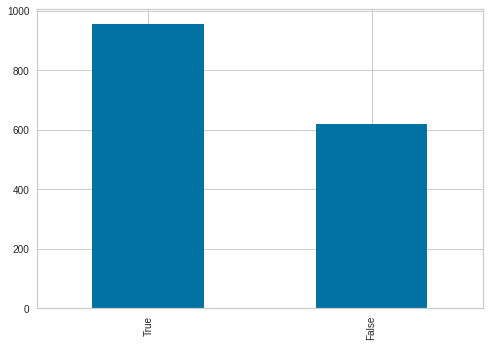

In [86]:
import matplotlib.pyplot as plt

# assume "df" is your DataFrame object
classification_counts = df['has_form'].value_counts()

# plot the histogram
classification_counts.plot(kind='bar')

<AxesSubplot:>

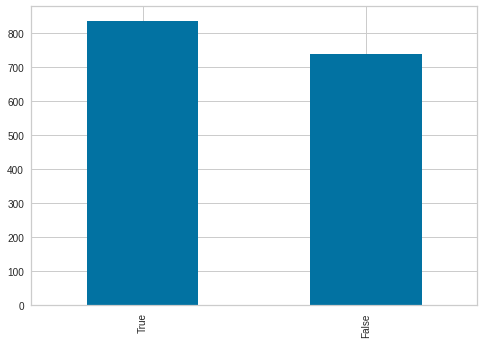

In [87]:
import matplotlib.pyplot as plt

# assume "df" is your DataFrame object
classification_counts = df['has_login_form'].value_counts()

# plot the histogram
classification_counts.plot(kind='bar')

#### JavaScript Data

The presence of JavaScript from webpages is collected. _JavaScript_ is widely used on many webpages ot provide dynamic content. It can also be used for cross-site scripting and inject remote malicious code in the page.

<AxesSubplot:>

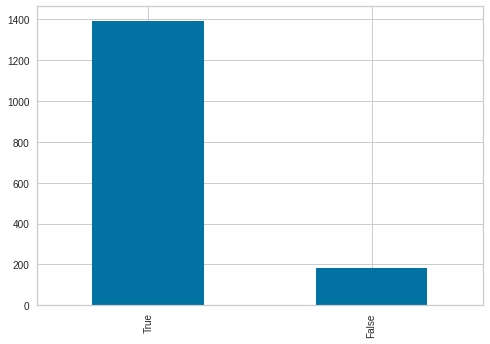

In [88]:
import matplotlib.pyplot as plt

# assume "df" is your DataFrame object
classification_counts = df['has_js'].value_counts()

# plot the histogram
classification_counts.plot(kind='bar')

We collect information about the presence of Base64 encoded-string in webpages. _Base64_ is often used to obfuscated malicious JavaScript code.

<AxesSubplot:>

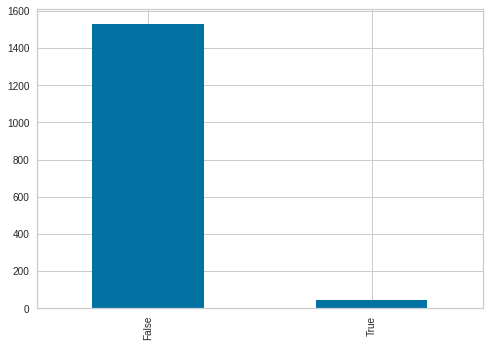

In [89]:
import matplotlib.pyplot as plt

# assume "df" is your DataFrame object
classification_counts = df['js_include_b64'].value_counts()

# plot the histogram
classification_counts.plot(kind='bar')

## Text Analysis Model

After multiple iterations, custom stop words were included from the default English stop words from the `ntlk` framework. These includes:

* **ccTLDs**. Country-Coded Top-Level Domains associated with URLs embedded in some webpages. While the entire URL is useful, the country code, by itself, is not;
* **Adverbs**. Some adverbs, such as _also_ or _may_ are not useful to the analysis.

In [90]:
from pycaret.nlp import *

# Session ID
sid = 493

# Add custom stop words here:
stop_words = ["com", "ca", "go", 
              "px", "co", "uv", "ru",
              "mx", "also", "use", 
              "wo", "may", "oo"]

# Generate the classifier for the text contents of the web pages
clsf = setup(data=df, 
             target='text_clean', 
             session_id=sid,
             custom_stopwords=stop_words)


Description,Value
session_id,493
Documents,1578
Vocab Size,25543
Custom Stopwords,True


INFO:logs:setup() succesfully completed......................................


### Latent Dirichlet Allocation(LDA) technique

#### Generate the Model

In [91]:
#@title LDA Options
nb_topics = 4 #@param{type: "integer"}


In [ ]:
# Generate the LDA model

# Create the model
m_lda = create_model(model='lda', num_topics=nb_topics, multi_core=True)
d_lda = assign_model(m_lda)

# Display a sample
display(d_lda.head())
display(d_lda.tail())

INFO:logs:(1914, 14)
INFO:logs:assign_model() succesfully completed......................................


,title_raw,is_english,has_form,has_login_form,has_js,js_include_b64,nb_tokens,text_clean,classification,Topic_0,Topic_1,Topic_2,Dominant_Topic,Perc_Dominant_Topic
0,quizzstar,True,False,False,True,False,619.0,friend love funny face fortune life friend lov...,benign,0.000745,0.108512,0.890744,Topic 2,0.89
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032446,0.470204,0.497350,Topic 2,0.50
2,: : kakprosto.ru :,True,True,True,True,True,137.0,version oriflame pamper sleep play tech hand m...,benign,0.166740,0.657452,0.175808,Topic 1,0.66
3,standard chartered bank,True,False,False,False,False,3.0,standard,benign,0.018900,0.960469,0.020631,Topic 1,0.96
4,NaN,True,False,False,True,False,40.0,help become well ummysoft gmail main_page down...,benign,0.308108,0.105109,0.586784,Topic 2,0.59


,title_raw,is_english,has_form,has_login_form,has_js,js_include_b64,nb_tokens,text_clean,classification,Topic_0,Topic_1,Topic_2,Dominant_Topic,Perc_Dominant_Topic
1994,...,True,False,True,True,False,6.0,,malicious,NaN,NaN,NaN,NaN,NaN
1995,sign in,True,True,True,True,False,8.0,sign sign square account sign,malicious,NaN,NaN,NaN,NaN,NaN
1996,sign in to your account,True,True,True,True,False,21.0,account_microsoft_term privacy_cookie,malicious,NaN,NaN,NaN,NaN,NaN
1997,sign in,True,True,True,True,False,3.0,sign authenticate,malicious,NaN,NaN,NaN,NaN,NaN
1998,sign in to your account,True,False,True,True,False,31.0,sign sign microsoft_account_exist account crea...,malicious,NaN,NaN,NaN,NaN,NaN


#### Evaluation

In [ ]:
plot_model(m_lda, plot = 'topic_model')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=25543, num_topics=3, decay=0.5, chunksize=100), plot=topic_model, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_model
INFO:logs:Preparing pyLDAvis visual


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.094604  0.076430       1        1  46.744510
1      0.147196 -0.093527       2        1  41.636249
0     -0.241800  0.017097       3        1  11.619241, topic_info=           Term         Freq        Total Category  logprob  loglift
2062       file  1322.000000  1322.000000  Default  30.0000  30.0000
220     account  1087.000000  1087.000000  Default  29.0000  29.0000
153        sign   963.000000   963.000000  Default  28.0000  28.0000
437      create   574.000000   574.000000  Default  27.0000  27.0000
208    download   491.000000   491.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
11110      icon    31.766779    53.718981   Topic3  -6.8923   1.6272
484         new    52.332584  1195.261280   Topic3  -6.3931  -0.9760
749        next    32.254500   282.937446   Topic3  -6.8771  -0.0191
1497        set    31.456172   312.116630   Topic3  -6.9021  -0.1423
1506       shop    31.038416   232.134365   Topic3  -6.9155   0.1404

[241 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1582      1  0.203113   access
1582      2  0.793985   access
1582      3  0.004103   access
220       1  0.104811  account
220       2  0.757582  account
...     ...       ...      ...
190       3  0.037914    world
193       1  0.643531     year
193       2  0.339211     year
193       3  0.015507     year
2019      2  0.997227      zip

[407 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
evaluate_model(m_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [92]:
try:
  d_lda.drop(['title_raw', 'text_clean', 'Dominant_Topic', 'Perc_Dominant_Topic'], axis=1, inplace = True)
except:
  pass
display(d_lda.head())
display(d_lda.tail())

,is_english,has_form,has_login_form,has_js,js_include_b64,nb_tokens,classification,Topic_0,Topic_1,Topic_2
0,True,False,False,True,False,619.0,benign,0.000745,0.108512,0.890744
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032446,0.470204,0.497350
2,True,True,True,True,True,137.0,benign,0.166740,0.657452,0.175808
3,True,False,False,False,False,3.0,benign,0.018900,0.960469,0.020631
4,True,False,False,True,False,40.0,benign,0.308108,0.105109,0.586784


,is_english,has_form,has_login_form,has_js,js_include_b64,nb_tokens,classification,Topic_0,Topic_1,Topic_2
1994,True,False,True,True,False,6.0,malicious,NaN,NaN,NaN
1995,True,True,True,True,False,8.0,malicious,NaN,NaN,NaN
1996,True,True,True,True,False,21.0,malicious,NaN,NaN,NaN
1997,True,True,True,True,False,3.0,malicious,NaN,NaN,NaN
1998,True,False,True,True,False,31.0,malicious,NaN,NaN,NaN


### Non-Negative Matrix Factorization(NMF)

#### Generate the Model

In [ ]:
m_nmf = create_model(model='nmf', num_topics=nb_topics, multi_core=True)
d_nmf = assign_model(m_nmf)

display(d_nmf.head())
display(d_nmf.tail())

INFO:logs:NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=6, random_state=493, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=6, random_state=493, shuffle=False, solver='cd', tol=0.0001,
    verbose=0), verbose=True)
INFO:logs:Determining model type
INFO:logs:model type: nmf
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=7938)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:06:31
Status,. . . . . . . . . . . . . . . . . .,Extracting Topics from Model


#### Evaluation

In [ ]:
evaluate_model(m_nmf)

In [ ]:
d_nmf.drop(['title_raw', 'text_clean', 'Dominant_Topic', 'Perc_Dominant_Topic'], axis=1, inplace = True)
d_nmf.head()

,has_form,has_login_form,has_js,js_include_b64,classification,Topic_0,Topic_1,Topic_2,Topic_3
0,True,True,True,False,benign,0.001158,0.000120,0.0,0.000202
1,False,False,True,False,benign,0.000040,0.000067,0.0,0.000158
2,True,True,True,False,benign,0.004300,0.000896,0.0,0.004000
3,False,False,True,False,benign,0.002717,0.000068,0.0,0.000123
4,True,True,True,False,benign,0.001158,0.000120,0.0,0.000202


### Export Text Analysis Model

In [107]:
%%capture
import os
import datetime

best_txt_model = m_lda
#best_txt_model = d_nmf

# Generate a file name based on the current date and time
now = datetime.datetime.now().strftime("text-%Y%m%d-%H%M%S")
file_name = f"{now}"
file_path = os.path.join(".", file_name)
# Save the best model to a file
save_model(best_txt_model, file_path)

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LdaModel(num_terms=25543, num_topics=3, decay=0.5, chunksize=100), model_name=./text-20230309-124930, verbose=True)
INFO:logs:LdaModel(num_terms=25543, num_topics=3, decay=0.5, chunksize=100)
INFO:logs:save_model() succesfully completed......................................


## Classification Model

To avoid generating the _"Numba needs NumPy 1.20 or less"_ exception, we ensure the `numba` package is upgraded before doing anything else.

In [ ]:
 %%capture
 !pip install numba --upgrade

In [ ]:
#@title Classifier Settings
sid = 1337 #@param {type:"integer"}
training_size = 0.85 #@param {type:"number"}



Once you have specified the settings to generate the classifier in the form above, define it using the code block below. 

**Notes**. This may take several minutes to complete. Don't forget to press _Enter_...

In [ ]:
from pycaret.classification import *

# `fix_imbalance: bool, default = False`
# When set to True, the training dataset is resampled using the algorithm 
# defined in fix_imbalance_method . When None, SMOTE is used by default.

text_model = d_lda

f_cls = setup(
    data=text_model,
    transformation=True, 
    normalize=True,
    fix_imbalance=False,
    target='classification',
    session_id=sid,
    #ignore_features = ['title_raw', 'is_english', 'text_clean', 'Dominant_Topic', 'Perc_Dominant_Topic'],
    train_size=training_size) 

,Description,Value
0,session_id,1337
1,Target,classification
2,Target Type,Binary
3,Label Encoded,"benign: 0, malicious: 1"
4,Original Data,"(1914, 10)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='classification',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                                                  target='classification')),
                ('binn', 'passthrough'), ('rem_outliers', '

### Model Selection

Using the classifier generated, we can now compare the various models available to classify the webpages as *benign* or *malicious*.

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9470,0.9852,0.9432,0.9558,0.9491,0.8938,0.8946,0.224
lightgbm,Light Gradient Boosting Machine,0.9425,0.9840,0.9390,0.9517,0.9450,0.8848,0.8855,0.116
xgboost,Extreme Gradient Boosting,0.9388,0.9836,0.9291,0.9538,0.9410,0.8775,0.8784,0.131
rf,Random Forest Classifier,0.9381,0.9797,0.9234,0.9577,0.9399,0.8760,0.8773,0.202
et,Extra Trees Classifier,0.9269,0.9728,0.9177,0.9421,0.9294,0.8535,0.8544,0.261
ada,Ada Boost Classifier,0.9104,0.9759,0.9348,0.8998,0.9166,0.8200,0.8213,0.091
knn,K Neighbors Classifier,0.9000,0.9540,0.9008,0.9099,0.9046,0.7995,0.8010,0.019
dt,Decision Tree Classifier,0.8963,0.8956,0.9063,0.8981,0.9013,0.7919,0.7937,0.012
nb,Naive Bayes,0.8612,0.9081,0.8880,0.8557,0.8710,0.7209,0.7226,0.011
lr,Logistic Regression,0.8597,0.9360,0.8667,0.8670,0.8665,0.7186,0.7191,0.291


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1337, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1337, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
best_model = tune_model(create_model("gbc"))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9627,0.9928,0.9577,0.9714,0.9645,0.9252,0.9253
1,0.9478,0.9826,0.9577,0.9444,0.9510,0.8951,0.8952
2,0.9627,0.9955,0.9577,0.9714,0.9645,0.9252,0.9253
3,0.9328,0.9814,0.9155,0.9559,0.9353,0.8656,0.8664
4,0.9552,0.9931,0.9718,0.9452,0.9583,0.9100,0.9104
5,0.9179,0.9727,0.9155,0.9286,0.9220,0.8354,0.8355
6,0.9328,0.9826,0.9286,0.9420,0.9353,0.8655,0.8656
7,0.9328,0.9690,0.9000,0.9692,0.9333,0.8659,0.8683
8,0.9030,0.9625,0.9000,0.9130,0.9065,0.8057,0.8058


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1337, subsample=0.65, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


### Export To File

In [ ]:
%%capture
import os
import datetime

# Generate a file name based on the current date and time
now = datetime.datetime.now().strftime("class-%Y%m%d-%H%M%S")
file_name = f"{now}"
file_path = os.path.join(".", file_name)
# Save the best model to a file
save_model(best_model, file_path)

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=5,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1337, subsample=0.65, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), model_name=./class-20230309-115502, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='classification',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=5, max_features='log2',
                                             max_leaf_nodes=None,
        

## Testing

In [94]:
%%capture
!pip install bs4
!pip install langdetect


Examples of reported sites can be found here: https://phishtank.org/

In [123]:
#@title URL
url = "https://www.paxfu1website.live/" #@param {type:"string"}


In [108]:
#@title Models
text_model_file = "text-20230309-124930" #@param {type:"string"}
class_model_file = "class-20230309-115502" #@param {type:"string"}


### Parsing Function

In [97]:
%%capture
import os
import re
import nltk
import string
import logging
import pandas as pd
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from langdetect import detect

logger = logging.getLogger(__name__)

nltk.download('punkt')
nltk.download('stopwords')
#
# Define a function to check the method attribute
def is_post(form):
    return form.get('method', '').lower() == 'post'
#
def remove_non_displayable(text):
    printable_chars = set(string.printable)
    return ''.join(filter(lambda x: x in printable_chars, text))
#
def parse_html(html:str) -> dict:
      features = {}
      soup = BeautifulSoup(html, 'html.parser')
      # get the title of the webpage
      if soup.title is not None and soup.title.string is not None:
          wp_title = remove_non_displayable(soup.title.string.strip().lower())
          features["title_raw"] = " ".join(nltk.word_tokenize(wp_title))
      else:
          features["title_raw"] = ""
      # Extract the text content from the HTML
      text = remove_non_displayable(soup.get_text())

      try:
          features["is_english"] = (detect(text) == "en")
      except:
          # If we cannot detect the language, it's probably not useful or
          # english, so we'll labelled it as non-english
          features["is_english"] = False
      logger.debug(f"\tIs English?        {features['is_english']}")

      # search for a login form
      forms = soup.find_all('form', {'method': 'POST'})
      forms += soup.find_all('form', {'method': 'post'})
      features["has_form"] = len(forms) > 0
      features["has_login_form"] = len(soup.find_all("input", {"type": "password"})) > 0
      logger.debug(f"\tHas Form?         {features['has_form']}")
      logger.debug(f"\tHas Login Form?   {features['has_login_form']}")

      # Check if JavaScript with base64 strings exists
      scripts = soup.find_all('script')
      features["has_js"] = (len(scripts) > 0)
      features["js_include_b64"] = False
      for script in scripts:
          if script.has_attr('src'):
              # Check if script is loaded from external source
              script_content = None
          else:
              script_content = script.string

          if script_content is not None and re.search("data:[a-zA-Z0-9+/]+={0,2}", script_content):
              features["js_include_b64"] |= True
      logger.debug(f"\tIncludes JavaScript?         {features['has_js']}")
      logger.debug(f"\tJS Embeds Base64 Strings?    {features['js_include_b64']}")

      # tokenize the text after convertign to lowercase
      tokens = nltk.word_tokenize(text.lower().strip())

      # remove stop words and punctuation
      stop_words = set(stopwords.words('english'))
      clean_tokens = [token for token in tokens if token.lower() not in stop_words and token not in string.punctuation]
      # Save the number of tokens
      features["nb_tokens"] = len(clean_tokens)
      logger.debug(f"\tNb Tokens:                   {features['nb_tokens']}")

      # join the cleaned tokens back into a string
      features["text_clean"] = ' '.join(clean_tokens)
      return features

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Application

In [124]:
import requests
from langdetect import detect
from bs4 import BeautifulSoup
#
from pycaret.classification import load_model, predict_model
import pandas as pd
#
features = {}
text_model = load_model(text_model_file)
class_model = load_model(class_model_file)

response = requests.get(url)
if response.status_code == 200:
  html = response.text
  print(f"[+] Received {len(html)} byte(s) from '{url}'.")
  f = parse_html(html)
  df = pd.DataFrame([f])
  exp_name = setup(data=df,target='text_clean')
  # Apply the LDA model to the unseen document to extract topics
  topics = assign_model(text_model)
  topics.drop(['title_raw', 'text_clean', 'Dominant_Topic', 'Perc_Dominant_Topic'], axis=1, inplace = True)
  prediction = predict_model(class_model, data=topics)
  label = prediction.iloc[-1]["Label"]
  
  print(f"Classification: {label.upper()}")

INFO:logs:(1, 13)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='classification',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                                            learning_rate=0.15, loss='dev

Classification: BENIGN
